### Install modules in terminal

In [46]:
%pip install pandas scikit-learn numpy hmmlearn matplotlib


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### Import modules

In [47]:
import pandas as pd

import numpy as np

import hmmlearn.hmm
from hmmlearn.hmm import MultinomialHMM, GaussianHMM

import matplotlib.pyplot as plt

### HMM Model with 2024 data

In [48]:
bitcoin_2024_df = pd.read_csv("./datasets/bitcoin_2024-01-01_2024-12-31.csv")

print(bitcoin_2024_df)


          Start         End      Open      High       Low     Close  \
0    2024-01-01  2024-01-02  42276.34  44122.03  42227.99  44122.03   
1    2024-01-02  2024-01-03  44179.50  45846.21  44179.50  44957.63   
2    2024-01-03  2024-01-04  44944.83  45474.95  40931.46  42818.03   
3    2024-01-04  2024-01-05  42845.26  44664.55  42635.44  44188.15   
4    2024-01-05  2024-01-06  44168.03  44229.51  43142.74  44112.11   
..          ...         ...       ...       ...       ...       ...   
361  2024-12-27  2024-12-28  95848.07  97199.96  93527.75  94452.57   
362  2024-12-28  2024-12-29  94394.88  95394.07  94098.12  95204.07   
363  2024-12-29  2024-12-30  95233.87  95272.03  93069.72  93659.56   
364  2024-12-30  2024-12-31  93610.59  94951.18  91603.06  92811.03   
365  2024-12-31  2025-01-01  92728.07  96016.01  92161.96  93647.01   

           Volume    Market Cap  
0    2.544613e+10  8.382507e+11  
1    4.659362e+10  8.859066e+11  
2    9.912438e+10  8.602104e+11  
3    1.6390

In [ ]:
# Load your data
df = bitcoin_2024_df
# Convert date columns if needed
df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])

# Feature engineering: log returns
df['LogReturn'] = np.log(df['Close'] / df['Close'].shift(1))

# Drop NaN from the first row (due to shift)
df = df.dropna()

# Prepare observation sequence (log returns and normalized volume)
df['Volume_Norm'] = (df['Volume'] - df['Volume'].mean()) / df['Volume'].std()

observations = df[['LogReturn', 'Volume_Norm']].values


# Fit a Gaussian HMM with N hidden states
model2024 = GaussianHMM(n_components=2, covariance_type="full", n_iter=1000) # n_components is the number of hidden states (in this case is 2, where 0 is a bear market and 1 is a bull market)
model2024.fit(observations)

# Predict the hidden states
hidden_states = model2024.predict(observations)

# Add hidden states to dataframe
df['State'] = hidden_states

print(df[['Start', 'Close', 'LogReturn', 'State']])


/var/folders/zp/ypnn7zh17bq2rm1j9d6glplw0000gn/T/ipykernel_19633/2420462427.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Volume_Norm'] = (df['Volume'] - df['Volume'].mean()) / df['Volume'].std()
Model is not converging.  Current: 415.0259429286869 is not greater than 415.0359438650542. Delta is -0.010000936367305258


         Start     Close  LogReturn  State
1   2024-01-02  44957.63   0.018761      0
2   2024-01-03  42818.03  -0.048761      1
3   2024-01-04  44188.15   0.031497      1
4   2024-01-05  44112.11  -0.001722      1
5   2024-01-06  43941.78  -0.003869      1
..         ...       ...        ...    ...
361 2024-12-27  94452.57  -0.014482      0
362 2024-12-28  95204.07   0.007925      0
363 2024-12-29  93659.56  -0.016356      0
364 2024-12-30  92811.03  -0.009101      0
365 2024-12-31  93647.01   0.008967      0

[365 rows x 4 columns]


/var/folders/zp/ypnn7zh17bq2rm1j9d6glplw0000gn/T/ipykernel_19633/2420462427.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['State'] = hidden_states


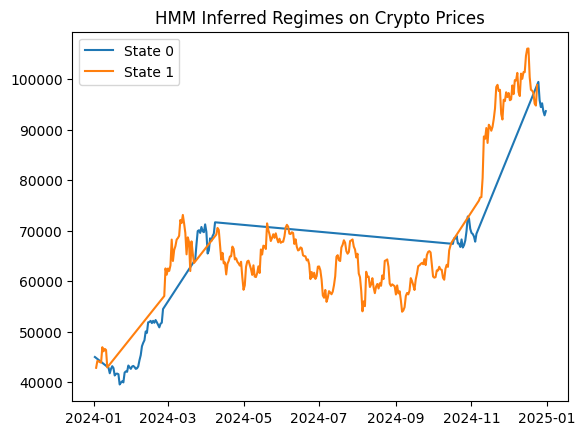

In [50]:
for i in range(model2024.n_components):
    state_series = df[df['State'] == i]
    plt.plot(state_series['Start'], state_series['Close'], label=f'State {i}')

    #the state 0 represents a bear market (steady growth with low volatility) and state 1 represents a bull market (downward trend and high volatility)

plt.legend()
plt.title("HMM Inferred Regimes on Crypto Prices")
plt.show()

### HMM Model with 2017 data

In [53]:
# bitcoin_2017_df = pd.read_csv("./datasets/BTC-2017min.csv")

# print(bitcoin_2017_df)

In [54]:
# # Convert to datetime
# df['date'] = pd.to_datetime(df['date'])

# # Sort by time just in case
# df = df.sort_values('date')

# # Feature Engineering: log return
# df['LogReturn'] = np.log(df['close'] / df['close'].shift(1))

# # Normalize Volume
# df['VolumeNorm'] = (df['Volume USD'] - df['Volume USD'].mean()) / df['Volume USD'].std()

# # Drop the first row with NaN return
# df = df.dropna()

# # Observation matrix: Log return + Volume
# observations = df[['LogReturn', 'VolumeNorm']].values

# print(observations)

In [55]:
# model = GaussianHMM(n_components=2, covariance_type="full", n_iter=100)
# model.fit(observations)

# # Predict hidden states
# df['State'] = model.predict(observations)

In [56]:
# plt.figure(figsize=(12,6))
# for i in range(model.n_components):
#     subset = df[df['State'] == i]
#     plt.plot(subset['date'], subset['close'], label=f'State {i}')

# plt.legend()
# plt.title("Hidden Market States (HMM)")
# plt.xlabel("Date")
# plt.ylabel("BTC Price")
# plt.show()


### Prediction 

In [62]:

# Example data
today_close = 44957.63
yesterday_close = 44122.03
today_vol = 46593616092.15278
volume_mean = df['Volume'].mean()
volume_std = df['Volume'].std()

# Calculate features
log_return = np.log(today_close / yesterday_close)
volume_norm = (today_vol - volume_mean) / volume_std

# Format as 2D array
new_obs = np.array([[log_return, volume_norm]])

# Predict hidden state
state_today = model2024.predict(new_obs)

print(f"Predicted hidden state: {state_today[0]}")


Predicted hidden state: 0
